# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [60]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def dirac(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Place the dirac
    s[n] = 1
    
    return s


Pretty printing has been turned ON


## Filtering 
**1.1**

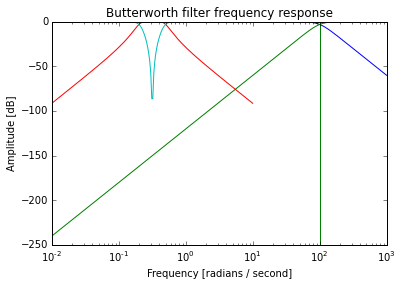

In [59]:
# For Butterworth, Chebychev-I  filters plot the magnitude resonse of Low-Pass, High-Pass, Band- Pass and Band-Stop 
# of the 3th order  filters

##-----BUTERWORTH FILTER------------##
# Butterworh low pass 3rd order
b1, a1 = signal.butter(3, 100, 'low', analog=True)
w1, h1 = signal.freqs(b1, a1)


# Butterworh high pass 3rd order
b2, a2 = signal.butter(3, 100, 'high', analog=True)
w2, h2 = signal.freqs(b2, a2)


# Butterworh band pass 3rd order
fs = 5000.0
lowcut = 500.0
highcut = 1250.0
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

b3, a3 = signal.butter( 3, [low, high], 'bandpass' , analog=True)
w3, h3 = signal.freqs(b3, a3)


#butterworth band stop 3rd order
b4, a4 = signal.butter( 3, [low, high], 'bandstop' , analog=True)
w4, h4 = signal.freqs(b4, a4)




plt.plot(w1, 20 * np.log10(abs(h1)), label = "low pass")
plt.plot(w2, 20 * np.log10(abs(h2)), label = "high pass")
plt.plot(w3, 20 * np.log10(abs(h3)), label = "band pass")
plt.plot(w4, 20 * np.log10(abs(h4)), label = "band stop")
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
#plt.margins(0, 0.1)
#plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()




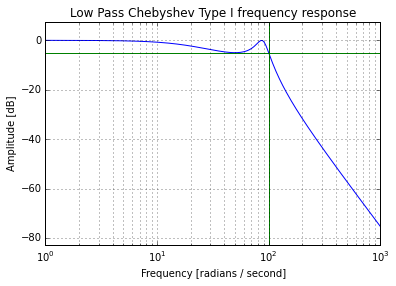

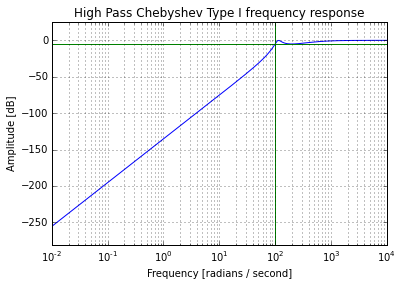

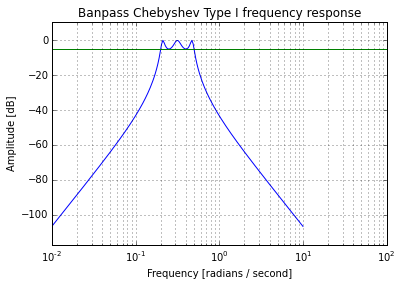

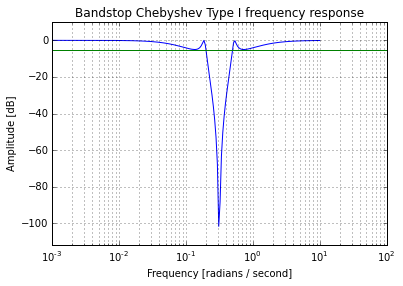

In [34]:
##-----CHEBYSHEV FILTER------------##
# chebyshev low pass 3rd order
b, a = signal.cheby1(3, 5, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Low Pass Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

# chebyshev high pass 3rd order
b, a = signal.cheby1(3, 5, 100, 'high', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('High Pass Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()


# chebyshev band pass 3rd order
b, a = signal.cheby1(3, 5,  [low, high], 'bandpass', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Banpass Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

# chebyshev band stop 3rd order
b, a = signal.cheby1(3, 5,  [low, high], 'bandstop', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Bandstop Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()





**1.2**

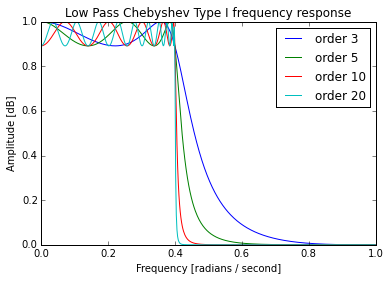

In [55]:
#  Plot  the  low-pass  response  of  the  Chebychev-I   filter  while  increasing  the  order  of  the   filter
# [3;5;10;20] (ripple = 1.0).  Discuss your observations.

b3, a3 = signal.cheby1( 3, 1.0, 0.4, 'low')
w3, h3 = signal.freqz(b3, a3)

b5, a5 = signal.cheby1( 5, 1.0, 0.4, 'low')
w5, h5 = signal.freqz(b5, a5)

b10, a10 = signal.cheby1( 10, 1.0, 0.4, 'low')
w10, h10 = signal.freqz(b10, a10)

b20, a20 = signal.cheby1( 20, 1.0, 0.4, 'low')
w20, h20 = signal.freqz(b20, a20)

plt.plot(w3/np.pi, abs(h3), label="order 3")
plt.plot(w5/np.pi, abs(h5), label="order 5")
plt.plot(w10/np.pi, abs(h10), label="order 10")
plt.plot(w20/np.pi, abs(h20), label="order 20")
plt.title('Low Pass Chebyshev Type I frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.show()



## Recursive filter 

**2.1**

In [ ]:
# Construct a signal
# x[k]k2[1;40]=dirac(k-20)



**2.2**

In [ ]:
# Apply  the  causal  and  the  anti-causal  parts  of  the  smoothing   lter  on  the  signal.   Analyze  the result.


**2.3**

**2.4**

In [ ]:
# Apply  the  causal  and  the  anti-causal  parts  of  the  smoothing   lter  on  the  signal.   Analyze  the result.


**3.1**

**3.2** , **3.3**

**3.4**